In [17]:
'''
这里的mark改了一下。。你对自己做的是35个单词一组。

分散 103
集中 102
一次 101
206-240

后面打的mark
 10 11

  自信程度

20 - 25

'''

import os.path as op
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from copy import deepcopy
import numpy as np
from autoreject import AutoReject

In [18]:
sub_ids = [
    'prex006','prex009','prex010','prex011','prex012',
                'prex015','prex016','prex017','prex018','prex019','prex022','prex023',
                'prex026','prex027','prex028'
                ,'prex033','prex034','prex037','prex038','prex039','prex040',
                'prex041','prex042','prex043','prex044','prex045',
                'prex046','prex047','prex048','prex049','prex050']
sub_ids = [ 'prex006' ]
evoked_original = list()
evoked_clean = list()
for sub_id,i in zip(sub_ids,range(len(sub_ids))):
    #读入之前处理好的reconst_raw
    save_path_ica = 'E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\\4raw_ica\\'
    reconst_raw=mne.io.read_raw_fif(save_path_ica + sub_id + '.fif')
    #截取block0的时间段，每个被试不一样。。你要换个mark才行。
    #或者有什么办法读取一个segment。
    # reconst_raw = reconst_raw.crop(tmax = 515.480)
    # reconst_raw = reconst_raw.crop(tmax = 1159.360)
    #这个是被试测试一的。
    #epoch
    target_events = {
                     'Stimulus/S101':101, 'Stimulus/S102':102, 'Stimulus/S103':103,
                     'Stimulus/S 10':10,'Stimulus/S 11':11,'Stimulus/S 20':20 ,
                     'Stimulus/S 21':21,'Stimulus/S 22':22,'Stimulus/S 23':23,
                     'Stimulus/S 24':24,'Stimulus/S 25':25}
    #先找events，epoch和average都是一步的事情。
    custom_mapping = target_events
    (events_from_annot,
     event_dict) = mne.events_from_annotations(reconst_raw, event_id=custom_mapping)


    events=[]

    voc_mark = 102
           # print(voc_mark)
           #遍历所有，再做一次筛选mark
    for j_event in range(len(events_from_annot)-1):
           # if ((events_from_annot[j_event,2] == voc_mark and events_from_annot[j_event+1,2] == 16)or(events_from_annot[j_event,2]==voc_mark and events_from_annot[j_event+1,2]==11)):
           #全部叠加，不考虑是否能够recognize。
        if events_from_annot[j_event,2] == voc_mark and events_from_annot[j_event+1,2] == 11 and events_from_annot[j_event+2,2]>=21:
            events.append(events_from_annot[j_event,:])
            print(events_from_annot[j_event,:])
    count_remembered_events = len(events)
    #取全部event对应的epochs
    # _, eog_scores= icas[i].find_bads_eog(raws[i])
    # ica.plot_scores(eog_scores)
    #顺带对比ica前后的效果。
    epochs = mne.Epochs(reconst_raw, events,baseline =(-0.2,0), tmin=-0.2, tmax=0.8, event_id=None,
                        preload=True, event_repeated='merge')

    save_path_epoch = 'E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\\5epoch\\'
    epochs.save(save_path_epoch + sub_id + 'M-epo.fif', overwrite=True)


    #用autoreject处理一下
    n_interpolates = np.array([1, 4, 32])
    consensus_percs = np.linspace(0, 0.8, 11)
    picks = mne.pick_types(epochs.info, meg=False, eeg=True, stim=False, eog=False,
                           include=[], exclude=[])
    ar = AutoReject(n_interpolates,consensus_percs,picks=picks,
                    thresh_method='random_search',random_state=23)
    ar.fit(epochs)
    epochs_clean = ar.transform(epochs)


    #先average看下结果，对比
    #如果结果不错就可以分别保存下来。

    evoked_original.append(epochs.average())
    evoked_clean.append(epochs_clean.average())

    save_path_epoch_clean = 'E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\\6epoch_clean\\'
    epochs_clean.save(save_path_epoch_clean + sub_id + 'M-epo.fif', overwrite=True)
    save_path_evoked = 'E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\\7evoked\\'
    evoked_clean[i].save(save_path_evoked + sub_id + 'M-ave.fif')

    # fig_original = evoked_original[i].plot(window_title = sub_id)
    # fig_original.savefig(save_path_evoked+'M_original_' + sub_id)
    # fig_clean = evoked_clean[i].plot(window_title = sub_id)
    # fig_clean.savefig(save_path_evoked+'M_clean_'+ sub_id)

Opening raw data file E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\4raw_ica\prex006.fif...
    Range : 0 ... 1027529 =      0.000 ...  2055.058 secs
Ready.
Used Annotations descriptions: ['Stimulus/S 10', 'Stimulus/S 11', 'Stimulus/S 20', 'Stimulus/S 21', 'Stimulus/S 22', 'Stimulus/S 23', 'Stimulus/S 24', 'Stimulus/S 25', 'Stimulus/S101', 'Stimulus/S102', 'Stimulus/S103']
[9880    0  102]
[23197     0   102]
[49421     0   102]
[55437     0   102]
[61496     0   102]
[70895     0   102]
[103528      0    102]
[113611      0    102]
[126168      0    102]
[132585      0    102]
[152376      0    102]
[212924      0    102]
[229415      0    102]
[232790      0    102]
[236215      0    102]
[245273      0    102]
[255440      0    102]
[279314      0    102]
[315371      0    102]
[337879      0    102]
[359611      0    102]
[393110      0    102]
[422276      0    102]
[452100      0    102]
[472641      0    102]
[478916      0    102]
[501874      0    102]
[507815    

C:\Users\SILVER~1\AppData\Local\Temp/ipykernel_21048/2195937425.py:14: RuntimeWarning: This filename (E:\Python LYW\RSA\spaced_learning\pre10\preprocessing\data\4raw_ica\prex006.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  reconst_raw=mne.io.read_raw_fif(save_path_ica + sub_id + '.fif')


Running autoreject on ch_type=eeg


Computing thresholds ...: 100%|██████████| 63/63 [00:10<00:00,  6.06it/s]


Repairing epochs:   0%|          | 0/48 [00:00<?, ?it/s]

Repairing epochs: 100%|██████████| 48/48 [00:00<00:00, 463.12it/s]

n_interp:   0%|          | 0/3 [00:00<?, ?it/s]

Repairing epochs:   0%|          | 0/48 [00:00<?, ?it/s]

Repairing epochs:  33%|███▎      | 16/48 [00:00<00:00, 146.79it/s]

Repairing epochs:  65%|██████▍   | 31/48 [00:00<00:00, 142.20it/s]

Repairing epochs: 100%|██████████| 48/48 [00:00<00:00, 136.77it/s]



Fold:   0%|          | 0/10 [00:00<?, ?it/s]


Fold:  10%|█         | 1/10 [00:00<00:01,  4.88it/s]


Fold:  20%|██        | 2/10 [00:00<00:01,  4.83it/s]


Fold:  30%|███       | 3/10 [00:00<00:01,  4.92it/s]


Fold:  40%|████      | 4/10 [00:00<00:01,  4.91it/s]


Fold:  50%|█████     | 5/10 [00:01<00:01,  4.85it/s]


Fold:  60%|██████    | 6/10 [00:01<00:00,  4.80it/s]


Fold:  70%|███████   | 7/10 [00:01<00:00,  4.83it/s]


Fold:  80%|████████  | 8/10 [00:01<00:00,  4.77it/s]






Estimated consensus=0.24 and n_interpolate=4




Repairing epochs:   0%|          | 0/48 [00:00<?, ?it/s]

Repairing epochs:  31%|███▏      | 15/48 [00:00<00:00, 142.86it/s]

Repairing epochs:  62%|██████▎   | 30/48 [00:00<00:00, 133.27it/s]

Repairing epochs: 100%|██████████| 48/48 [00:00<00:00, 129.09it/s]

Dropped 1 epoch: 40
Overwriting existing file.


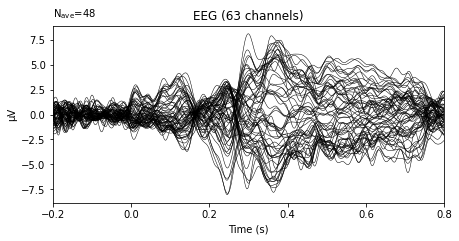

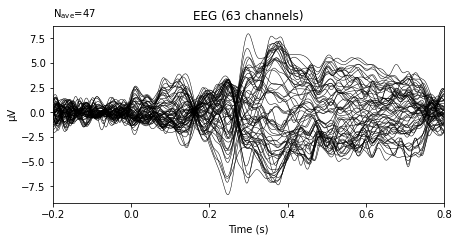

In [19]:

fig_original = evoked_original[i].plot(window_title = sub_id)
fig_original.savefig(save_path_evoked+'M_original_' + sub_id)
fig_clean = evoked_clean[i].plot(window_title = sub_id)
fig_clean.savefig(save_path_evoked+'M_clean_'+ sub_id)